In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from sklearn import preprocessing
import math
import warnings
warnings.filterwarnings("ignore")

### import data

In [2]:
url='https://docs.google.com/uc?export=download&id=17wR77bUZw4HhLthKOb3SSXFdpoUJr-Ab'
df=pd.read_excel(url)

In [3]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

### Data Exploratory

In [4]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [6]:
#Check for duplicate rows
df.duplicated().sum()

68

In [7]:
df.drop_duplicates()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13543 rows x 17 columns]

In [8]:
df.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

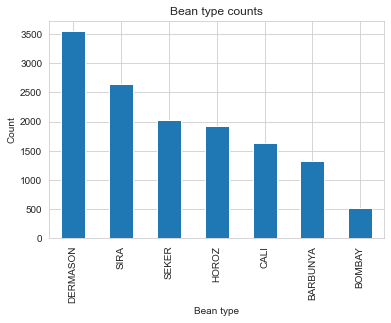

In [9]:
df['Class'].value_counts().plot(kind='bar',
                                   title= "Bean type counts",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

In [10]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

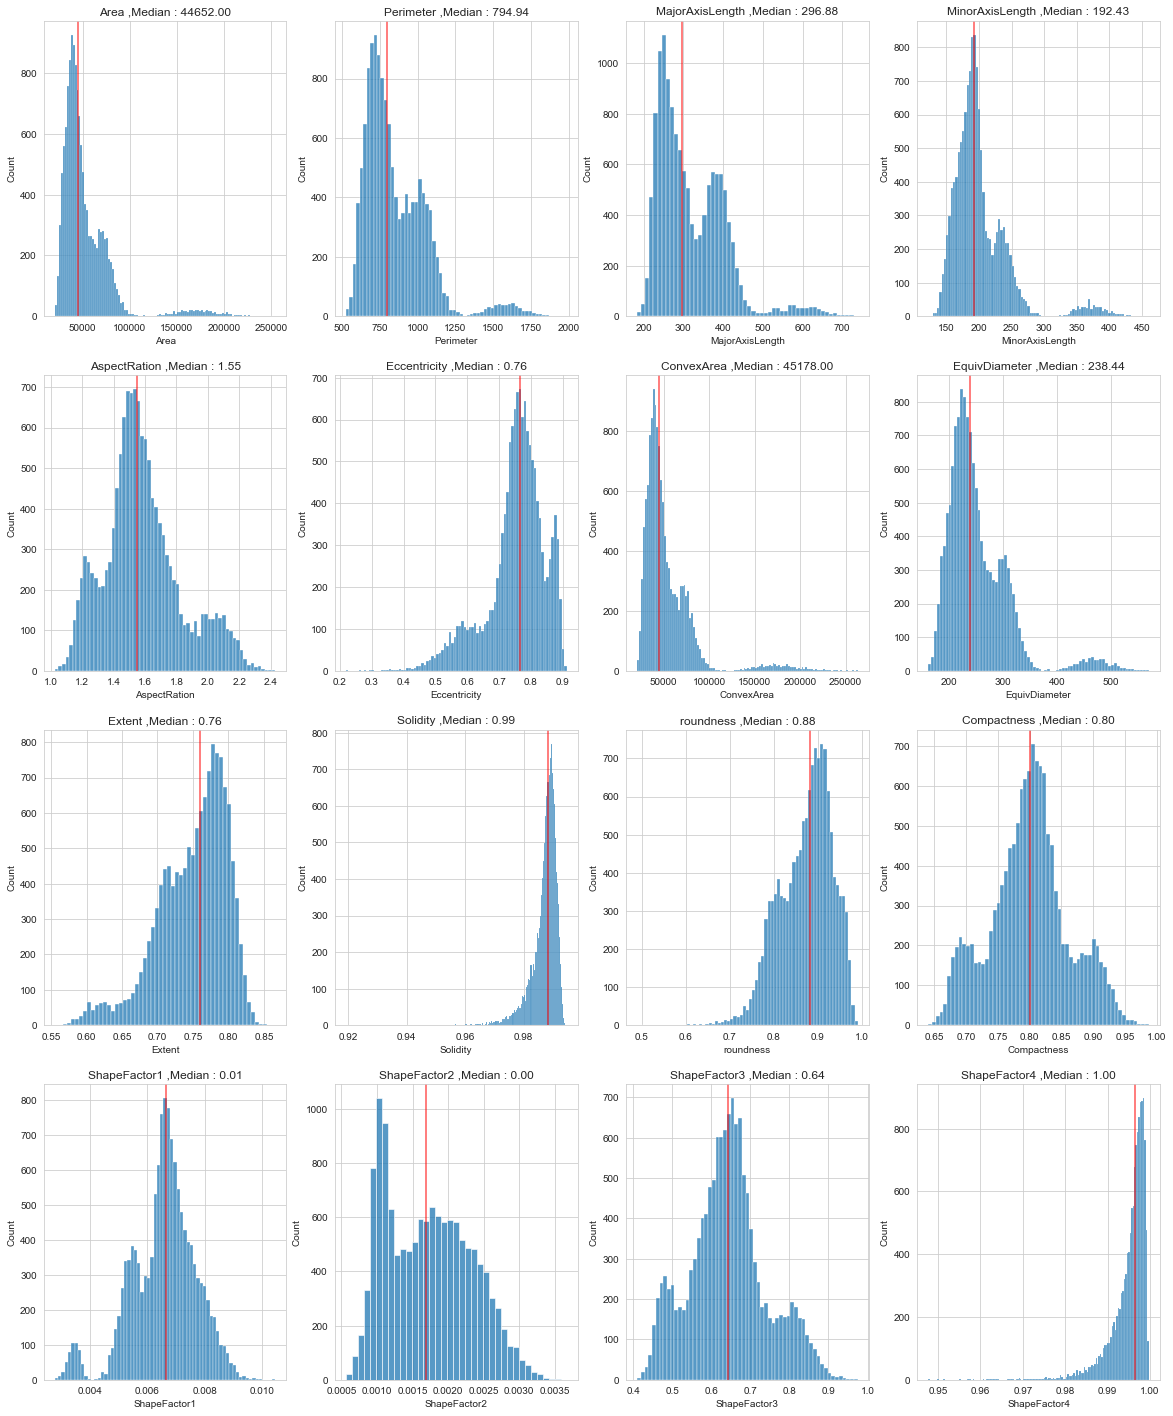

In [11]:
#uni-variant analysis
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(df.columns.drop("Class"), axes.flatten()):
    sns.histplot(data=df[feature],ax=ax)
    median = df[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

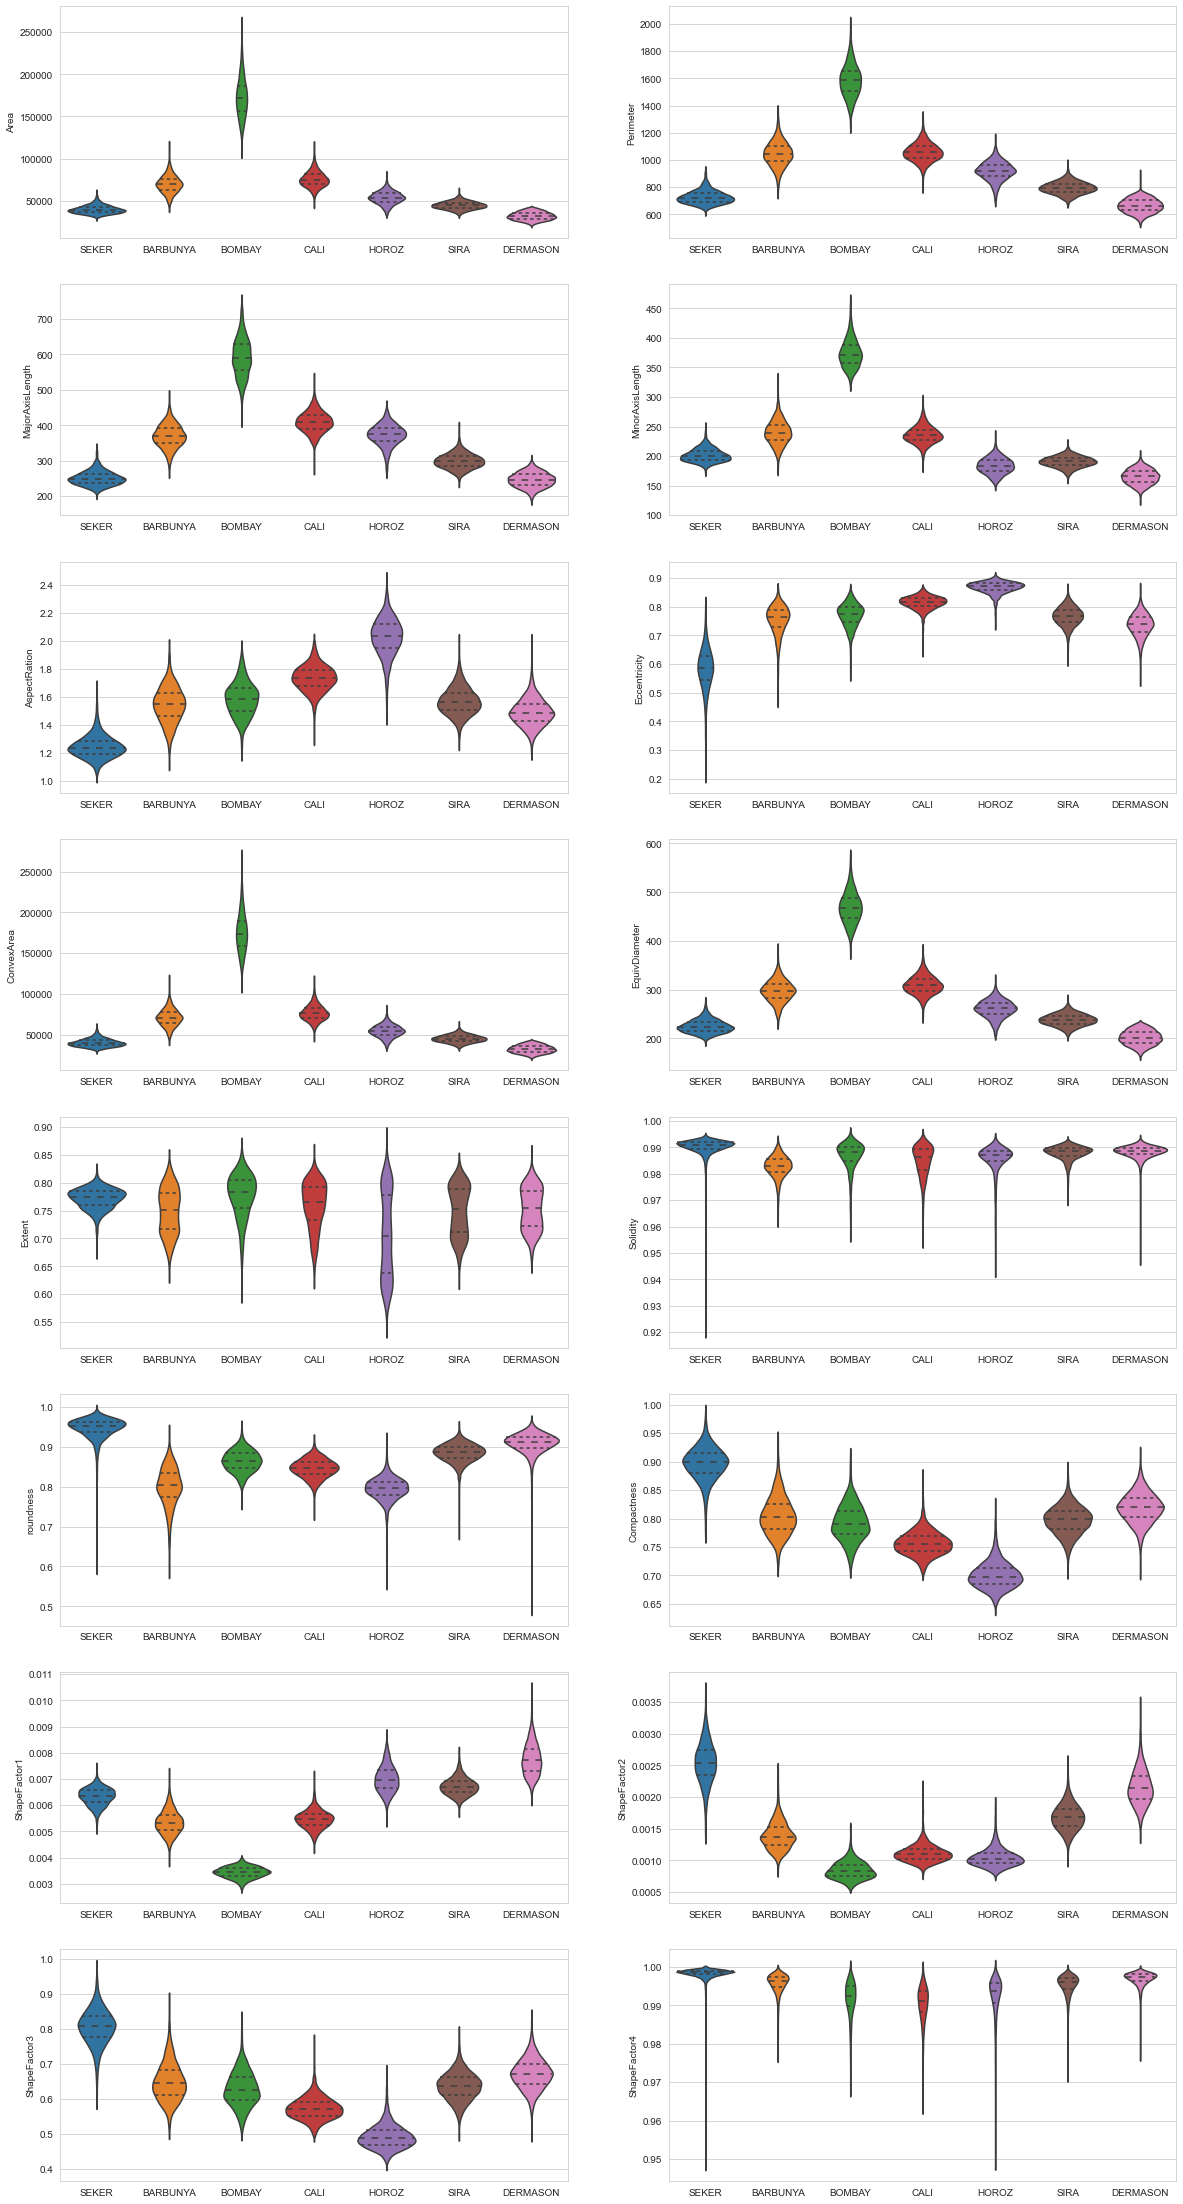

In [26]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(df.columns.drop("Class"), axes.flatten()):
    sns.violinplot(data=df,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

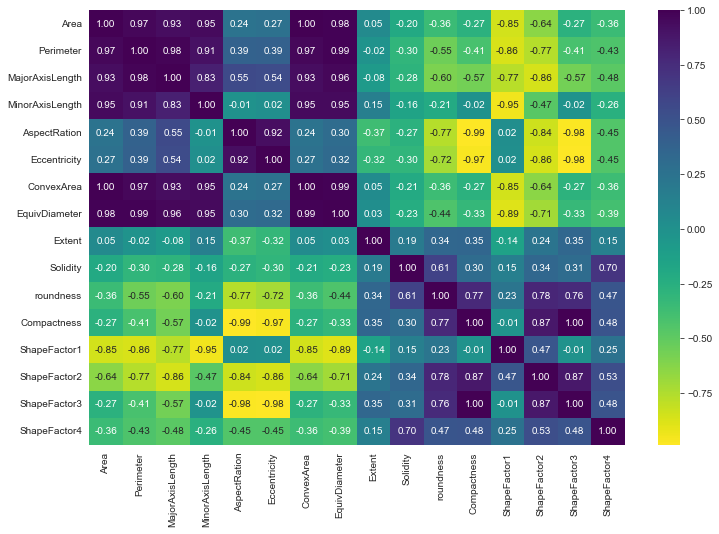

In [27]:
plt.figure(figsize = [12, 8])
sns.heatmap(df.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

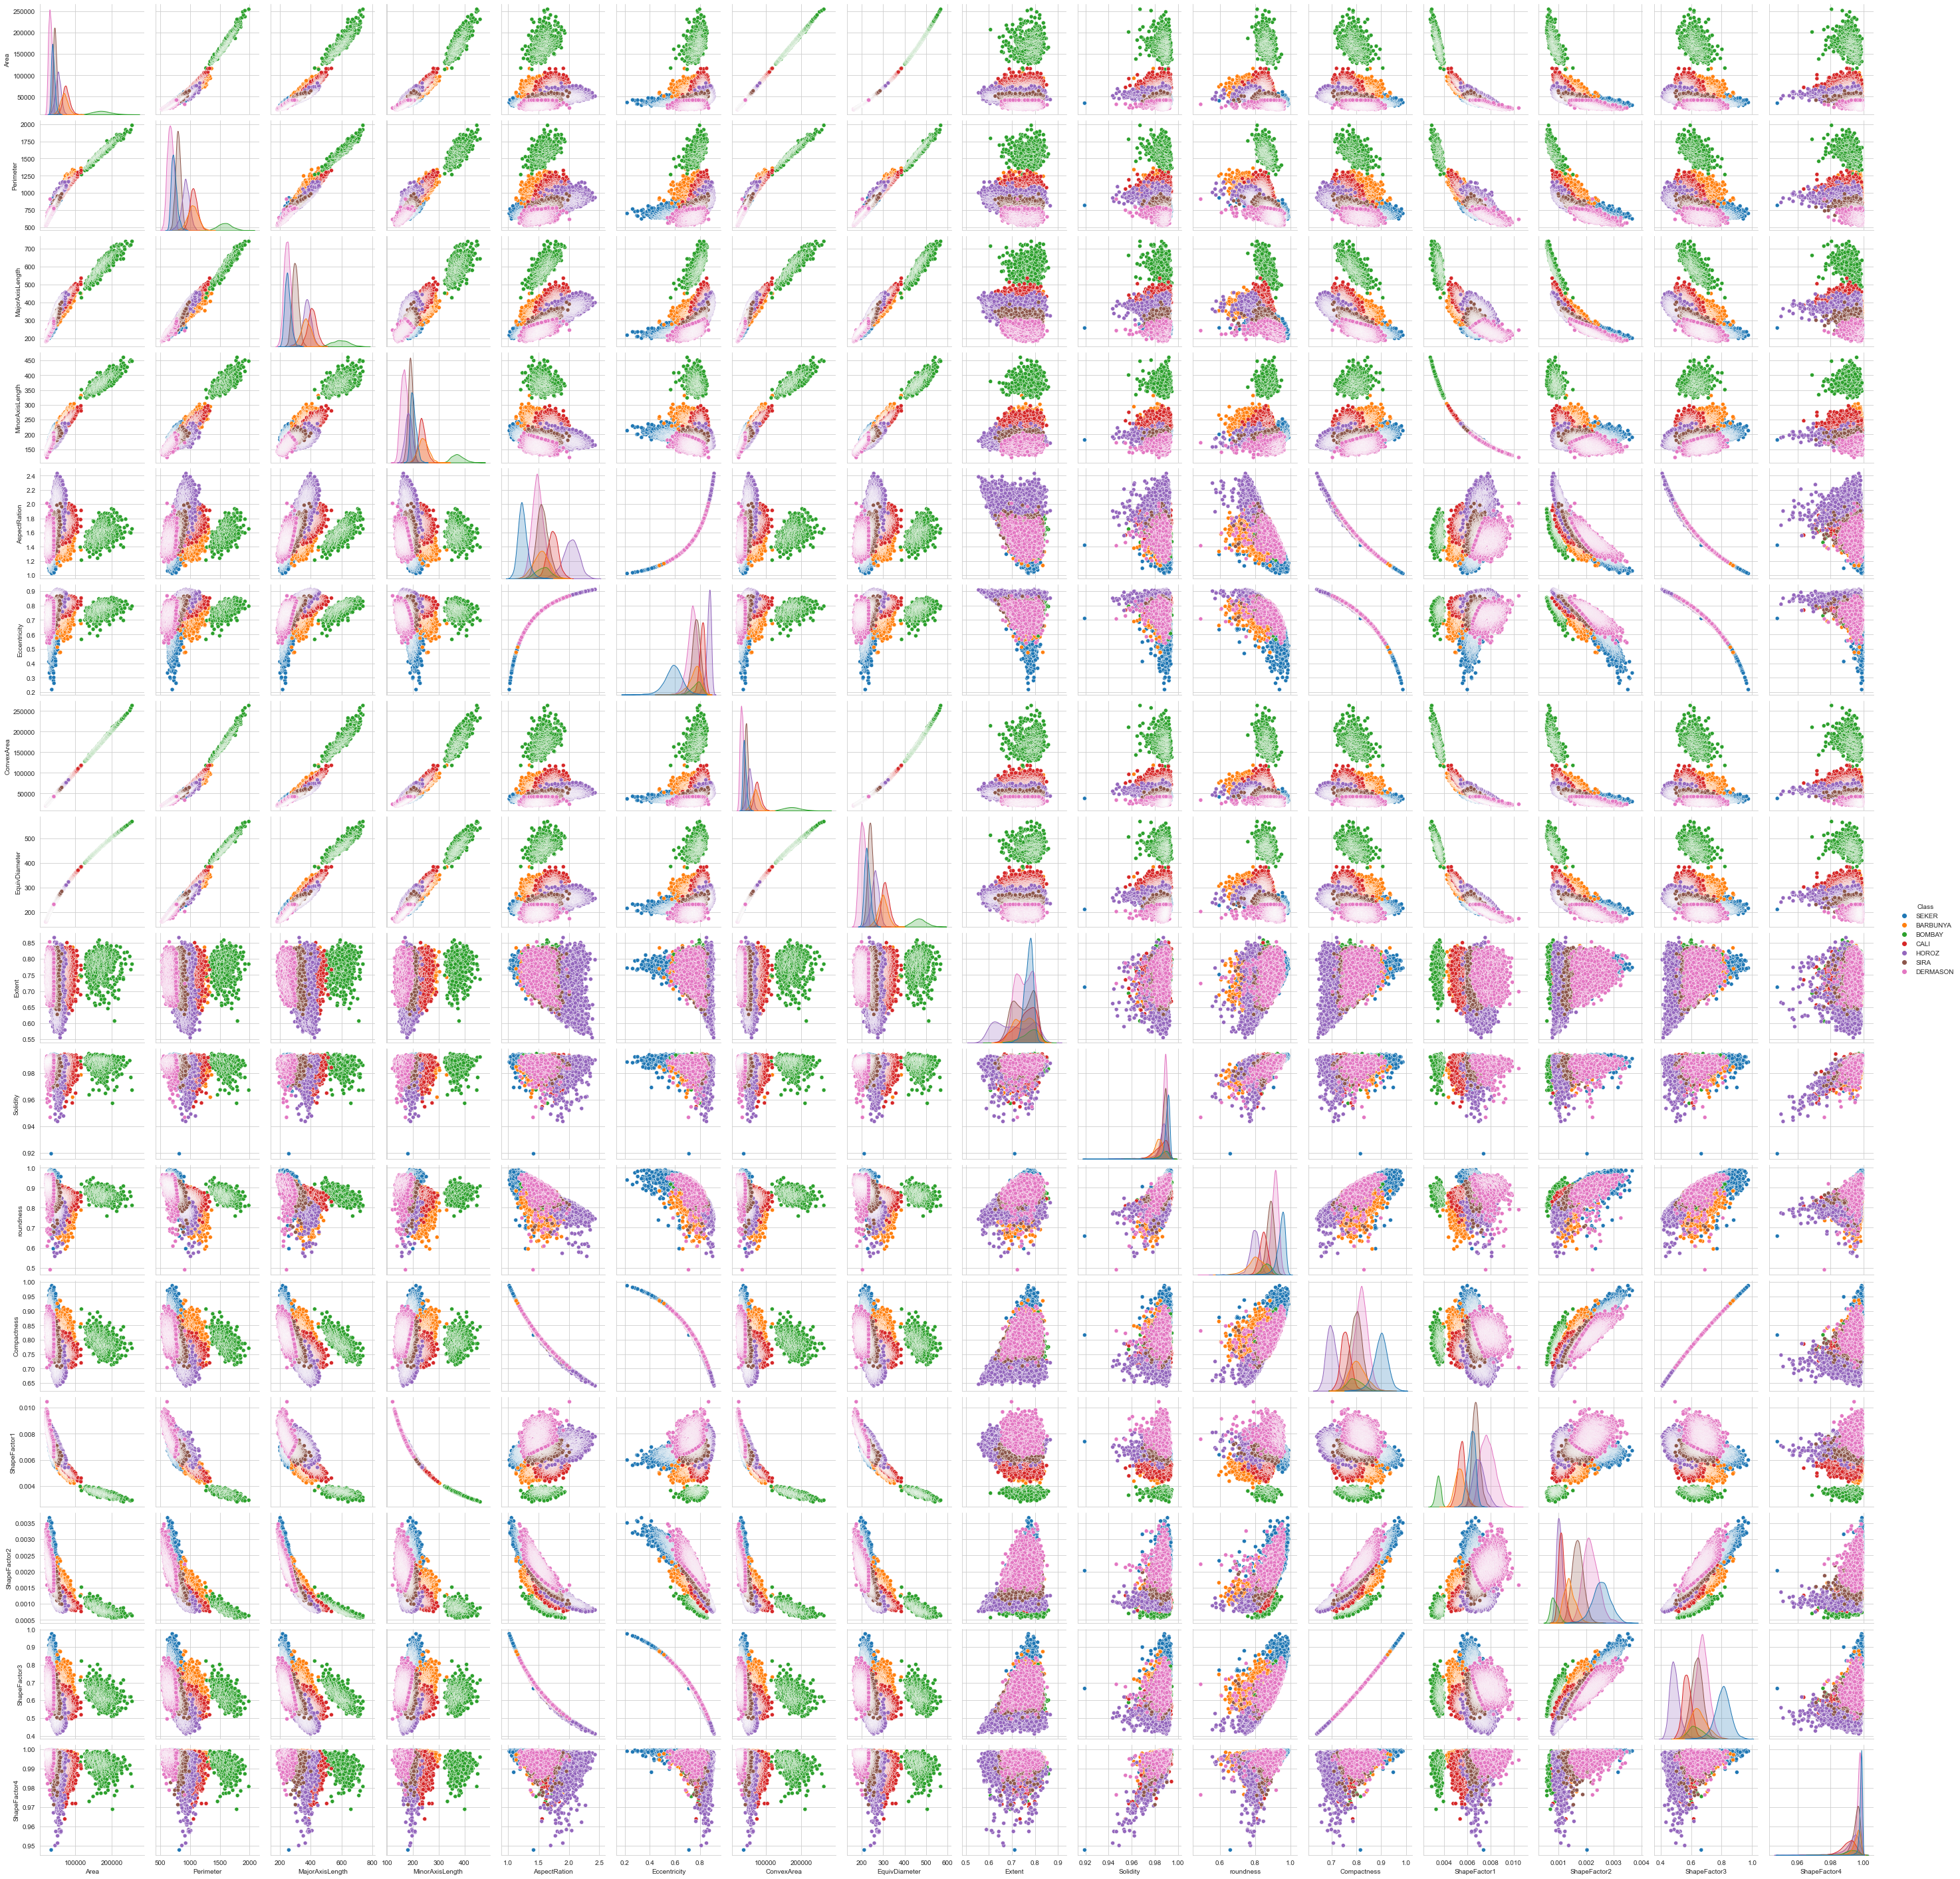

In [28]:
sns.pairplot(df, hue="Class")

### Model training & evluation

In [23]:
#preprocessing--label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Class=le.fit_transform(df.Class)

In [24]:
X=df.drop(columns='Class')
Y=df.Class

In [25]:
#preprocessing--Scaler
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
Xs = scaler.fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xs, Y, test_size =0.2, random_state=1)

In [36]:
#Custom Logistic Regression
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

In [67]:
#Custom decision tree Classifier
import numpy as np

class Node_():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
        
class decisiontreeclassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node_(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node_(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### MultiClass Logistic Regression

In [165]:
lr = MultiClassLogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict_classes(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",round(accuracy_score(y_train, y_pred),4))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(y_train, y_pred))

Training Accuracy: 0.9186
Training Confusion Matrix:
 [[ 936    0   70    0    7    9   30]
 [   0  415    4    0    0    0    0]
 [  21    0 1236    0   22    3   15]
 [   1    0    0 2567    6   50  217]
 [   2    0   32   15 1466    0   27]
 [  15    0    0   29    1 1528   49]
 [   6    0    3  179   45   28 1854]]


In [168]:
y_pt = lr.predict_classes(x_test)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",round(accuracy_score(y_test, y_pt),4))
from sklearn.metrics import confusion_matrix
print("Testing Confusion Matrix:\n",confusion_matrix(y_test, y_pt))

Testing Accuracy: 0.9218
Testing Confusion Matrix:
 [[241   0  17   0   0   1  11]
 [  0 103   0   0   0   0   0]
 [  8   0 319   0   4   0   2]
 [  1   0   0 639   1   7  57]
 [  0   0  11   2 368   0   5]
 [  2   0   0   8   0 379  16]
 [  1   0   0  39  14   6 461]]


### Classification Tree

In [ ]:
#max_depth=3
dtModel_3 = decisiontreeclassifier(min_samples_split=3, max_depth=3)
dtModel_3.fit(x_train,y_train.values.reshape(-1,1))

In [69]:
y_hat = dtModel_3.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y_hat))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(y_train, y_hat))

Training Accuracy: 0.8270573108008817
Training Confusion Matrix:
 [[   0    1  999    0    4   11   37]
 [   0  419    0    0    0    0    0]
 [   0    0 1268    0   19    2    8]
 [   0    0    0 2570    1   54  216]
 [   0    0   84   12 1370    0   76]
 [   0    0    6   41    0 1519   56]
 [   0    0   26  195    5   30 1859]]


In [106]:
y_that = dtModel_3.predict(x_test)
from sklearn.metrics import accuracy_score
print("testing Accuracy:",accuracy_score(y_test, y_that))
from sklearn.metrics import confusion_matrix
print("testing Confusion Matrix:\n",confusion_matrix(y_test, y_that))

testing Accuracy: 0.8303341902313625
testing Confusion Matrix:
 [[  0   0 258   0   0   1  11]
 [  0 103   0   0   0   0   0]
 [  0   0 329   0   4   0   0]
 [  0   0   0 644   0   9  52]
 [  0   0  16   2 349   0  19]
 [  0   0   3  14   0 372  16]
 [  0   0   5  44   2   6 464]]


In [102]:
#max_depth=5
dtModel_5 = decisiontreeclassifier(min_samples_split=3, max_depth=5)
dtModel_5.fit(x_train,y_train.values.reshape(-1,1))

In [107]:
y_hat = dtModel_5.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y_hat))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(y_train, y_hat))

Training Accuracy: 0.43919911829537106
Training Confusion Matrix:
 [[   0    0    0    9    0  101  942]
 [   0    0    0   37    0   10  372]
 [   0    0    0   78    0    2 1217]
 [   0    0    0 2592    0  248    1]
 [   0    0    0 1239    0    0  303]
 [   0    0    0   71    0 1510   41]
 [   0    0    0 1415    0   20  680]]


In [108]:
y_5hat = dtModel_5.predict(x_test)
from sklearn.metrics import accuracy_score
print("testing Accuracy:",accuracy_score(y_test, y_5hat))
from sklearn.metrics import confusion_matrix
print("testing Confusion Matrix:\n",confusion_matrix(y_test, y_5hat))

testing Accuracy: 0.43738523687109804
testing Confusion Matrix:
 [[  0   0   0   6   0  20 244]
 [  0   0   0   8   0   2  93]
 [  0   0   0  30   0   0 303]
 [  0   0   0 646   0  59   0]
 [  0   0   0 313   0   0  73]
 [  0   0   0  20   0 376   9]
 [  0   0   0 346   0   6 169]]


### SVM

In [101]:
#SVM
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder


def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    # For other algorithms computing the same projection, see
    # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


class MulticlassSVM(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose

    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue

            smallest = min(smallest, g[k])

        return g.max() - smallest

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]

        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)

        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)

        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))

        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))

        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)

        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0

            for ii in range(n_samples):
                i = ind[ii]

                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue

                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v

                if v < 1e-12:
                    continue

                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)

                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta

            if it == 0:
                violation_init = violation_sum

            vratio = violation_sum / violation_init

            if self.verbose >= 1:
                print("iter", it + 1, "violation", round(vratio,4))

            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break

        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)


In [83]:
svc = MulticlassSVM(C=0.1, tol=0.01, max_iter=50, random_state=0, verbose=1)
svc.fit(x_train, y_train)

iter 1 violation 1.0
iter 2 violation 0.66
iter 3 violation 0.3489
iter 4 violation 0.2169
iter 5 violation 0.1493
iter 6 violation 0.1166
iter 7 violation 0.0902
iter 8 violation 0.0731
iter 9 violation 0.0616
iter 10 violation 0.0515
iter 11 violation 0.0451
iter 12 violation 0.0396
iter 13 violation 0.0368
iter 14 violation 0.0332
iter 15 violation 0.0299
iter 16 violation 0.027
iter 17 violation 0.0246
iter 18 violation 0.0238
iter 19 violation 0.0228
iter 20 violation 0.0212
iter 21 violation 0.0197
iter 22 violation 0.0176
iter 23 violation 0.0171
iter 24 violation 0.0161
iter 25 violation 0.0153
iter 26 violation 0.0146
iter 27 violation 0.0136
iter 28 violation 0.013
iter 29 violation 0.0118
iter 30 violation 0.0111
iter 31 violation 0.0103
iter 32 violation 0.0103
iter 33 violation 0.0102
iter 34 violation 0.0098
Converged


MulticlassSVM(C=0.1, random_state=0, tol=(0.01,), verbose=1)

In [84]:
print("Accuracy of SVM in training set is ",round(svc.score(x_train, y_train),4))
from sklearn.metrics import confusion_matrix
print('SVM Confusion Matrix of training is\n',confusion_matrix(y_train,svc.predict(x_train)))
print("Accuracy of SVM in testing set is ",round(svc.score(x_test, y_test),4))
print('SVM Confusion Matrix of testing is\n',confusion_matrix(y_test,svc.predict(x_test)))

Accuracy of SVM in training set is  0.9221
SVM Confusion Matrix of training is
 [[ 953    0   63    0    4    7   25]
 [   0  419    0    0    0    0    0]
 [  26    0 1230    0   25    3   13]
 [   1    0    0 2586    8   56  190]
 [   4    0   18   16 1480    0   24]
 [  15    0    2   19    1 1543   42]
 [   4    0    8  187   46   41 1829]]
Accuracy of SVM in testing set is  0.9262
SVM Confusion Matrix of testing is
 [[246   0  14   0   0   1   9]
 [  0 103   0   0   0   0   0]
 [ 11   0 316   0   5   0   1]
 [  1   0   0 645   2   8  49]
 [  0   0   6   1 374   0   5]
 [  2   0   0   5   0 385  13]
 [  1   0   1  40  16  10 453]]


### Random Forest

In [126]:
from collections import Counter

import numpy as np


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


In [127]:
from collections import Counter

import numpy as np

#from .decision_tree import DecisionTree


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [148]:
df_=df.reset_index()

In [149]:
X1=df_.drop(columns=['Class','index']).values
Y1=df_.Class.values

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size =0.2, random_state=1)

In [151]:
clf = RandomForest(n_trees=3, max_depth=10)

clf.fit(X_train, Y_train)

In [152]:
y_r = clf.predict(X_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(Y_train, y_r))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(Y_train, y_r))

Training Accuracy: 0.9578434974283615
Training Confusion Matrix:
 [[1002    0   38    0    5    2    5]
 [   0  419    0    0    0    0    0]
 [  13    0 1270    0    7    2    5]
 [   0    0    0 2682    0   24  135]
 [   1    0   12   10 1500    1   18]
 [   3    0    0   13    0 1580   26]
 [   1    0    2  117   11    8 1976]]


In [174]:
y_rt = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(Y_test, y_rt))
from sklearn.metrics import confusion_matrix
print("Testing Confusion Matrix:\n",confusion_matrix(Y_test, y_rt))

Testing Accuracy: 0.9173705471905986
Testing Confusion Matrix:
 [[234   1  16   0   5   2  12]
 [  0 103   0   0   0   0   0]
 [ 18   0 308   0   6   1   0]
 [  0   0   0 652   2   9  42]
 [  3   0   4   1 367   0  11]
 [  4   0   0  20   0 372   9]
 [  0   0   0  46   7   6 462]]


In [154]:
clf1 = RandomForest(n_trees=3, max_depth=7)

clf1.fit(X_train, Y_train)

In [155]:
y_r = clf1.predict(X_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(Y_train, y_r))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(Y_train, y_r))

Training Accuracy: 0.9288207200587804
Training Confusion Matrix:
 [[ 940    0   76    0    5    8   23]
 [   1  418    0    0    0    0    0]
 [  20    1 1248    0   13    4   11]
 [   0    0    0 2658    1   33  149]
 [   3    0   31   14 1458    0   36]
 [   5    0    1   21    0 1559   36]
 [   2    0    6  235   13   27 1832]]


In [156]:
y_rt = clf1.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(Y_test, y_rt))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(Y_test, y_rt))

Training Accuracy: 0.9173705471905986
Training Confusion Matrix:
 [[226   0  27   0   0   2  15]
 [  0 103   0   0   0   0   0]
 [ 15   0 314   0   3   0   1]
 [  0   0   0 660   2   8  35]
 [  1   0   3   2 366   0  14]
 [  3   0   0  11   0 377  14]
 [  0   0   1  54   7   7 452]]


In [175]:
clf2 = RandomForest(n_trees=100, max_depth=8)

clf2.fit(X_train, Y_train)

In [176]:
y_r = clf2.predict(X_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(Y_train, y_r))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(Y_train, y_r))

Training Accuracy: 0.9478324761204996
Training Confusion Matrix:
 [[ 980    0   51    0    4    4   13]
 [   0  419    0    0    0    0    0]
 [  18    0 1257    0   14    3    5]
 [   0    0    0 2692    0   28  121]
 [   1    0   13   13 1493    0   22]
 [   0    0    0   22    0 1571   29]
 [   0    0    2  188    8    9 1908]]


In [177]:
y_rt = clf2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(Y_test, y_rt))
from sklearn.metrics import confusion_matrix
print("Training Confusion Matrix:\n",confusion_matrix(Y_test, y_rt))

Training Accuracy: 0.9261843554902681
Training Confusion Matrix:
 [[237   0  21   0   3   1   8]
 [  0 103   0   0   0   0   0]
 [ 18   0 309   0   5   0   1]
 [  0   0   0 661   1   6  37]
 [  1   0   5   2 370   0   8]
 [  3   0   0  11   0 380  11]
 [  0   0   0  49   4   6 462]]


In [8]:
class DNNClassifier(object):
    '''
    Parameters: layer_dims -- List Dimensions of layers including input and output layer
                hidden_layers -- List of hidden layers
                                 'relu','sigmoid','tanh','softplus','arctan','elu','identity','softmax'
                                 Note: 1. last layer must be softmax 
                                       2. For relu and elu need to mention alpha value as below
                                        ['tanh',('relu',alpha1),('elu',alpha2),('relu',alpha3),'softmax']
                                        need to give a tuple for relu and elu if you want to mention alpha
                                        if not default alpha is 0
                init_type -- init_type -- he_normal  --> N(0,sqrt(2/fanin))
                             he_uniform --> Uniform(-sqrt(6/fanin),sqrt(6/fanin))
                             xavier_normal --> N(0,2/(fanin+fanout))
                             xavier_uniform --> Uniform(-sqrt(6/fanin+fanout),sqrt(6/fanin+fanout))
                                 
                learning_rate -- Learning rate
                optimization_method -- optimization method 'SGD','SGDM','RMSP','ADAM'
                batch_size -- Batch size to update weights 
                max_epoch -- Max epoch number
                             Note : Max_iter  = max_epoch * (size of traing / batch size)
                tolarance -- if abs(previous cost  - current cost ) < tol training will be stopped
                             if None -- No check will be performed
                keep_proba -- probability for dropout
                              if 1 then there is no dropout
                penality -- regularization penality
                            values taken 'l1','l2',None(default)
                lamda -- l1 or l2 regularization value
                beta1 -- SGDM and adam optimization param
                beta2 -- RMSP and adam optimization value
                seed -- Random seed to generate randomness
                verbose -- takes 0  or 1 
    '''
    
    def __init__(self,layer_dims,hidden_layers,init_type='he_normal',learning_rate=0.1,
                 optimization_method = 'SGD',batch_size=64,max_epoch=100,tolarance = 0.00001,
                 keep_proba=1,penality=None,lamda=0,beta1=0.9,
                 beta2=0.999,seed=None,verbose=0):
        self.layer_dims = layer_dims
        self.hidden_layers = hidden_layers
        self.init_type = init_type
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.batch_size = batch_size
        self.keep_proba = keep_proba
        self.penality = penality
        self.lamda = lamda
        self.beta1 = beta1
        self.beta2 = beta2
        self.seed = seed
        self.max_epoch = max_epoch
        self.tol = tolarance
        self.verbose = verbose
    @staticmethod
    def weights_init(layer_dims,init_type='he_normal',seed=None):
        
        """
        Arguments:
            layer_dims -- python array (list) containing the dimensions of each layer in our network
            layer_dims lis is like  [ no of input features,# of neurons in hidden layer-1,..,
                                     # of neurons in hidden layer-n shape,output]
            init_type -- he_normal  --> N(0,sqrt(2/fanin))
                         he_uniform --> Uniform(-sqrt(6/fanin),sqrt(6/fanin))
                         xavier_normal --> N(0,2/(fanin+fanout))
                         xavier_uniform --> Uniform(-sqrt(6/fanin+fanout),sqrt(6/fanin+fanout))
                         seed -- random seed to generate weights
        Returns:
            parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        """
        np.random.seed(seed)
        parameters = {}
        opt_parameters = {}
        L = len(layer_dims)            # number of layers in the network
        if  init_type == 'he_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], 1))  
            
        elif init_type == 'he_uniform':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.uniform(-np.sqrt(6.0/layer_dims[l-1]),
                                                        np.sqrt(6.0/layer_dims[l-1]),
                                                        (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.uniform(-np.sqrt(6.0/layer_dims[l-1]),
                                                        np.sqrt(6.0/layer_dims[l-1]),
                                                        (layer_dims[l], 1))
            
        elif init_type == 'xavier_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,2.0/(layer_dims[l]+layer_dims[l-1]),
                                                                   (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,2.0/(layer_dims[l]+layer_dims[l-1]),
                                                                      (layer_dims[l], 1)) 
            
        elif init_type == 'xavier_uniform':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.uniform(-(np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.uniform(-(np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (layer_dims[l], 1))
        
        return parameters
    
    @staticmethod
    def sigmoid(X,derivative=False):
        '''Compute Sigmaoid and its derivative'''
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out
    @staticmethod
    def ReLU(X,alpha=0,derivative=False):
        '''Compute ReLU function and derivative'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*X,X)
        elif derivative == True:
            X_relu = np.ones_like(X,dtype=np.float64)
            X_relu[X < 0] = alpha
            return X_relu
    @staticmethod
    def Tanh(X,derivative=False):
        '''Compute tanh values and derivative of tanh'''
        X = np.array(X)
        if derivative == False:
            return np.tanh(X)
        if derivative == True:
            return 1 - (np.tanh(X))**2
    @staticmethod
    def softplus(X,derivative=False):
        '''Compute tanh values and derivative of tanh'''
        X = np.array(X)
        if derivative == False:
            return np.log(1+np.exp(X))
        if derivative == True:
            return 1 / (1 + np.exp(-np.array(X)))
    @staticmethod
    def arctan(X,derivative=False):
        '''Compute tan^-1(X) and derivative'''
        if derivative == False:
            return  np.arctan(X)
        if derivative == True:
            return 1/ (1 + np.square(X))
    @staticmethod
    def identity(X,derivative=False):
        '''identity function and derivative f(x) = x'''
        X = np.array(X)
        if derivative ==  False:
            return X
        if derivative == True:
            return np.ones_like(X)
    @staticmethod
    def elu(X,alpha=0,derivative=False):
        '''Exponential Linear Unit'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*(np.exp(X)-1),X)
        elif derivative == True:
            return np.where(X<0,alpha*(np.exp(X)),1)
    @staticmethod
    def softmax(X):
        """Compute softmax values for each sets of scores in x."""
        return np.exp(X) / np.sum(np.exp(X),axis=0)
    @staticmethod
    def forward_propagation(X, hidden_layers,parameters,keep_prob=1,seed=None):
    
        """"
        Arguments:
            X -- data, numpy array of shape (input size, number of examples)
            hidden_layers -- List of hideden layers
            weights -- Output of weights_init dict (parameters)
            keep_prob -- probability of keeping a neuron active during drop-out, scalar
        Returns:
            AL -- last post-activation value
            caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
        """
        if seed != None:
            np.random.seed(seed)
        caches = []
        A = X
        L = len(hidden_layers)
        for l,active_function in enumerate(hidden_layers,start=1):
            A_prev = A 
        
            Z = np.dot(parameters['W' + str(l)],A_prev)+parameters['b' + str(l)]
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    A = DNNClassifier.ReLU(Z,active_function[1])
                elif active_function[0] == 'elu':
                    A = DNNClassifier.elu(Z,active_function[1])
            else:
                if active_function == "sigmoid":
                    A = DNNClassifier.sigmoid(Z)
                elif active_function == "identity":
                    A = DNNClassifier.identity(Z)
                elif active_function == "arctan":
                    A = DNNClassifier.arctan(Z)
                elif active_function == "softplus":
                    A = DNNClassifier.softplus(Z)
                elif active_function == "tanh":
                    A = DNNClassifier.Tanh(Z)
                elif active_function == "softmax":
                    A = DNNClassifier.softmax(Z)
                elif  active_function == "relu":
                    A = DNNClassifier.ReLU(Z)
                elif active_function == 'elu':
                    A = DNNClassifier.elu(Z)
            
            if keep_prob != 1 and l != L and l != 1:
                D = np.random.rand(A.shape[0],A.shape[1])
                D = (D<keep_prob)
                A = np.multiply(A,D)
                A = A / keep_prob
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)],D), Z)
                caches.append(cache)
            else:
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)]), Z)
                #print(A.shape)
                caches.append(cache)      
        return A, caches
    @staticmethod
    def compute_cost(A, Y, parameters, lamda=0,penality=None):
        """
        Implement the cost function with L2 regularization. See formula (2) above.
    
        Arguments:
            A -- post-activation, output of forward propagation
            Y -- "true" labels vector, of shape (output size, number of examples)
            parameters -- python dictionary containing parameters of the model
    
        Returns:
            cost - value of the regularized loss function 
        """
        m = Y.shape[1]
    
        cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
    
        L = len(parameters)//2
    
        if penality == 'l2' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.square(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        elif penality == 'l1' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.abs(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        return cost
    @staticmethod
    def back_propagation(AL, Y, caches, hidden_layers, keep_prob=1, penality=None,lamda=0):
        """
        Implement the backward propagation
    
        Arguments:
            AL -- probability vector, output of the forward propagation (L_model_forward())
            Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
            caches -- list of caches containing:
            hidden_layers -- hidden layer names
            keep_prob -- probabaility for dropout
            penality -- regularization penality 'l1' or 'l2' or None
    
        Returns:
             grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
        """
        grads = {}
        L = len(caches) # the number of layers
    
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)
    
        # Initializing the backpropagation
        dZL = AL - Y
    
        cache = caches[L-1]
        linear_cache, activation_cache = cache
        AL, W, b = linear_cache
        grads["dW" + str(L)] = np.dot(dZL,AL.T)/m
        grads["db" + str(L)] = np.sum(dZL,axis=1,keepdims=True)/m
        grads["dA" + str(L-1)] = np.dot(W.T,dZL)
    
    
        # Loop from l=L-2 to l=0
        v_dropout = 0
        for l in reversed(range(L-1)):
            cache = caches[l]
            active_function = hidden_layers[l]
        
            linear_cache, Z = cache
            try:
                A_prev, W, b = linear_cache
            except:
                A_prev, W, b, D = linear_cache
                v_dropout = 1
            
            m = A_prev.shape[1]
        
            if keep_prob != 1 and v_dropout == 1:
                dA_prev = np.multiply(grads["dA" + str(l + 1)],D)
                dA_prev = dA_prev/keep_prob
                v_dropout = 0
            else:
                dA_prev = grads["dA" + str(l + 1)]
                v_dropout = 0
            
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,active_function[1],derivative=True))
                elif active_function[0] == 'elu':
                    dZ = np.multiply(dA_prev,DNNClassifier.elu(Z,active_function[1],derivative=True))
            else:
                if active_function == "sigmoid":
                    dZ = np.multiply(dA_prev,DNNClassifier.sigmoid(Z,derivative=True))
                elif active_function == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,derivative=True))
                elif active_function == "tanh":
                    dZ = np.multiply(dA_prev,DNNClassifier.Tanh(Z,derivative=True))
                elif active_function == "identity":
                    dZ = np.multiply(dA_prev,DNNClassifier.identity(Z,derivative=True))
                elif active_function == "arctan":
                    dZ = np.multiply(dA_prev,DNNClassifier.arctan(Z,derivative=True))
                elif active_function == "softplus":
                    dZ = np.multiply(dA_prev,DNNClassifier.softplus(Z,derivative=True))
                elif active_function == 'elu':
                    dZ = np.multiply(dA_prev,DNNClassifier.elu(Z,derivative=True))
            
            grads["dA" + str(l)] = np.dot(W.T,dZ)
        
            if penality == 'l2':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * W)/m)
            elif penality == 'l1':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * np.sign(W+10**-8))/m)
            else:
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)
            
            grads["db" + str(l + 1)] = np.sum(dZ,axis=1,keepdims=True)/m   
        return grads
    
    @staticmethod
    def update_parameters(parameters, grads,learning_rate,iter_no,method = 'SGD',opt_parameters=None,beta1=0.9,beta2=0.999):
        """
        Update parameters using gradient descent
    
        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward
        method -- method for updation of weights
                  'SGD','SGDM','RMSP','ADAM'
        learning rate -- learning rate alpha value
        beta1 -- weighted avg parameter for SGDM and ADAM
        beta2 -- weighted avg parameter for RMSP and ADAM
    
        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
                      opt_parameters
        """
    
        L = len(parameters) // 2 # number of layers in the neural network
        if method == 'SGD':
            for l in range(L):
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l + 1)]
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l + 1)]
            opt_parameters = None
        elif method == 'SGDM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*opt_parameters['vdw'+str(l+1)]
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*opt_parameters['vdb'+str(l+1)]
        elif method == 'RMSP':
            for l in range(L):
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                     (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                           (1-beta2)*np.square(grads["dW" + str(l + 1)])
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(grads["dW" + str(l + 1)]/(np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(grads["db" + str(l + 1)]/(np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        elif method == 'ADAM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                                  (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                                   (1-beta2)*np.square(grads["dW" + str(l + 1)])
            
                learning_rate = learning_rate * np.sqrt((1-beta2**iter_no)/((1-beta1**iter_no)+10**-8))
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdw'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdb'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        
        return parameters,opt_parameters
    
    def fit(self,X,y):
        '''
        X -- data, numpy array of shape (input size, number of examples)
        y -- lables, numpy array of shape (no of classes,n)
        
        '''
        
        np.random.seed(self.seed)
        self.grads = {}
        self.costs = []
        M = X.shape[1]
        opt_parameters = {}
        
        if self.verbose == 1:
            print('Initilizing Weights...')
        self.parameters = self.weights_init(self.layer_dims,self.init_type,self.seed)
        self.iter_no = 0
        idx = np.arange(0,M)
        
        if self.optimization_method != 'SGD':
            for l in range(1, len(self.layer_dims)):
                opt_parameters['vdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['vdb' + str(l)] = np.zeros((self.layer_dims[l], 1))
                opt_parameters['sdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['sdb' + str(l)] = np.zeros((self.layer_dims[l], 1)) 
        
        if self.verbose == 1:
            print('Starting Training...')
            
        for epoch_no in range(1,self.max_epoch+1):
            np.random.shuffle(idx)
            X = X[:,idx]
            y = y[:,idx]
            for i in range(0,M, self.batch_size):
                self.iter_no = self.iter_no + 1
                X_batch = X[:,i:i + self.batch_size]
                y_batch = y[:,i:i + self.batch_size]
                # Forward propagation:
                AL, cache = self.forward_propagation(X_batch,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
                #cost
                cost = self.compute_cost(AL, y_batch, self.parameters,self.lamda,self.penality)
                self.costs.append(cost)
                
                if self.tol != None:
                    try:
                        if abs(cost - self.costs[-2]) < self.tol:
                            return self
                    except:
                        pass
                #back prop
                grads = self.back_propagation(AL, y_batch, cache,self.hidden_layers,self.keep_proba,self.penality,self.lamda)
                
                #update params
                self.parameters,opt_parameters = self.update_parameters(self.parameters,grads,self.learning_rate,
                                                                        self.iter_no-1,self.optimization_method,
                                                                        opt_parameters,self.beta1,self.beta2)
                
                if self.verbose == 1:
                    if self.iter_no % 100 == 0:
                        print("Cost after iteration {}: {}".format(self.iter_no, cost))
                
        return self
    def predict(self,X,proba=False):
        '''predicting values
           arguments: X - iput data
                      proba -- False then return value
                               True then return probabaility
        '''
        
        out, _ = self.forward_propagation(X,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
        if proba == True:
            return out.T
        else:
            return np.argmax(out, axis=0)

In [26]:
#preprocessing--label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Class=le.fit_transform(df.Class)

In [27]:
X=df.drop(columns='Class')
Y=df.Class

In [28]:
#preprocessing--Scaler
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state=1)

In [53]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y_train).T
x = x_train.T

In [57]:
y_t = lb.fit_transform(y_test).T
x_t = x_test.T

In [54]:
print(x.shape)
print(y.shape)

(16, 10888)
(7, 10888)


In [112]:
y_train

2663     0
7648     6
7480     6
3339     0
4179     2
        ..
905      5
5192     2
12172    3
235      5
13349    3
Name: Class, Length: 10888, dtype: int64

**Start with 1 hidden layer**

In [129]:
model1 = DNNClassifier(layer_dims=[x.shape[0], 3, 7],hidden_layers=[('relu',0),'softmax'],
                      optimization_method='SGD',batch_size=64,tolarance=None,max_epoch=1000,verbose=0)
model1.fit(x,y)
y1_pred = model1.predict(x,proba=False)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y1_pred))
y1_ = model1.predict(x_t,proba=False)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(y_test, y1_))

Training Accuracy: 0.9142174871418075
Testing Accuracy: 0.9181050312155711


In [122]:
model2 = DNNClassifier(layer_dims=[x.shape[0], 8, 7],hidden_layers=[('relu',0),'softmax'],
                      optimization_method='SGD',batch_size=64,tolarance=None,max_epoch=1000,verbose=0)
model2.fit(x,y)

In [123]:
y2_pred = model2.predict(x,proba=False)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y2_pred))

Training Accuracy: 0.9334129316678913


In [124]:
y2_ = model2.predict(x_t,proba=False)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(y_test, y2_))

Testing Accuracy: 0.9316929856775615


The first model have a hidden layer with 3 nodes, Second model have a hidden layer with 8 nodes, and both models' the activation function is relu. We can find that the second one is better than first one, as the nodes increase the performance also increase. So we add more nodes in this layer.

**Add more nodes in this layer**

In [99]:
model3 = DNNClassifier(layer_dims=[x.shape[0], 14, 7],hidden_layers=[('relu',0),'softmax'],
                      optimization_method='SGD',tolarance=None,max_epoch=1000,verbose=0)
model3.fit(x,y)

In [100]:
y3_pred = model3.predict(x,proba=False)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y3_pred))

Training Accuracy: 0.9354335047759


In [101]:
y3_ = model3.predict(x_t,proba=False)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(y_test, y3_))

Testing Accuracy: 0.937201615864855


When we add nodes from 8 to 14, the performance is not increased very much. Thus, this layer we decided to use 8 nodes.

**Add more layers based on the 8 nodes layer model**

In [139]:
model4 = DNNClassifier(layer_dims=[x.shape[0], 10, 8, 7],hidden_layers=[('relu',0),('relu',0.001),'softmax'],
                      optimization_method='SGD',tolarance=None,max_epoch=1000,verbose=0)
model4.fit(x,y)

In [140]:
y4_pred = model4.predict(x,proba=False)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y4_pred))

Training Accuracy: 0.9358008817046289


In [141]:
y4_ = model4.predict(x_t,proba=False)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(y_test, y4_))

Testing Accuracy: 0.9261843554902681


The training accuracy has a little bit improvement but the testing accuracy decreases. Thus we decided back to the one hidden layer model with 8 nodes.

**Use 1 hidden layer model with sigmoid**

In [109]:
model5 = DNNClassifier(layer_dims=[x.shape[0], 8, 7],hidden_layers=['sigmoid','softmax'],
                      optimization_method='SGD',tolarance=None,max_epoch=1000,verbose=0)
model5.fit(x,y)

In [115]:
y5_pred = model5.predict(x,proba=False)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y5_pred))

Training Accuracy: 0.9318515797207936


In [116]:
y5_ = model5.predict(x_t,proba=False)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(y_test, y5_))

Testing Accuracy: 0.9346309217774513


Comparing the sigmoid activation function one(model5) with the relu one(model2), there is not huge difference.

**Work with Gradient optimization model, which is batch size equal to dataset dimensions**

In [125]:
model6 = DNNClassifier(layer_dims=[x.shape[0], 8, 7],hidden_layers=[('relu',0),'softmax'],
                      optimization_method='SGD',batch_size=10888,tolarance=None,max_epoch=1000,verbose=0)
model6.fit(x,y)

In [126]:
y6_pred = model6.predict(x,proba=False)
from sklearn.metrics import accuracy_score
print("Training Accuracy:",accuracy_score(y_train, y6_pred))

Training Accuracy: 0.9218405584129317


In [127]:
y6_ = model6.predict(x_t,proba=False)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:",accuracy_score(y_test, y6_))

Testing Accuracy: 0.9261843554902681


The Gradient optimization model performed worse than Stochastic gradient one. However, the difference is not very large, also.